In [4]:
import os
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from glob import glob
from matplotlib import pyplot as plt
from pprint import pprint
from tqdm import tqdm

In [104]:
matrix = torch.uniform(low=-5, high=5, size=(3, 10))

AttributeError: module 'torch' has no attribute 'uniform'

In [7]:
distribution = torch.distributions.uniform.Uniform(low=-5, high=5, validate_args=None)

In [114]:
matrix = torch.softmax(distribution.sample((5,10)), dim=1)

In [115]:
matrix

tensor([[2.4863e-02, 1.4132e-01, 8.2199e-04, 5.2855e-02, 1.8059e-01, 9.2676e-04,
         4.6859e-01, 7.2675e-02, 3.3356e-02, 2.4000e-02],
        [2.9720e-04, 7.8397e-02, 7.8009e-05, 7.1830e-01, 3.2468e-03, 1.6526e-01,
         1.2391e-03, 3.1203e-02, 1.1599e-04, 1.8632e-03],
        [2.1191e-02, 2.3130e-03, 9.5311e-03, 2.4872e-04, 1.4123e-02, 8.4976e-04,
         9.1950e-01, 2.4360e-02, 7.7433e-03, 1.3559e-04],
        [8.4940e-01, 2.8140e-03, 1.4983e-02, 2.2665e-03, 2.1899e-02, 3.7885e-02,
         2.3422e-02, 9.0015e-04, 3.9438e-02, 6.9938e-03],
        [6.9336e-02, 1.6489e-03, 3.1516e-01, 3.9333e-04, 1.5269e-04, 4.6245e-04,
         2.8809e-01, 2.4767e-04, 1.2761e-02, 3.1176e-01]])

In [116]:
torch.topk(matrix, k=2, dim=1)

(tensor([[0.4686, 0.1806],
         [0.7183, 0.1653],
         [0.9195, 0.0244],
         [0.8494, 0.0394],
         [0.3152, 0.3118]]), tensor([[6, 4],
         [3, 5],
         [6, 7],
         [0, 8],
         [2, 9]]))

In [117]:
values, indices = torch.topk(matrix, k=2, dim=1)

In [118]:
indices

tensor([[6, 4],
        [3, 5],
        [6, 7],
        [0, 8],
        [2, 9]])

In [119]:
tmp = matrix.scatter(1, indices, torch.zeros_like(matrix))

In [120]:
mask = tmp == 0

In [121]:
result = matrix * mask.float()

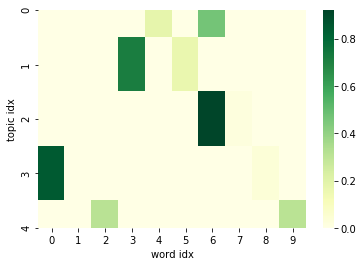

In [132]:
# plt.imshow(result.numpy())
ax = sns.heatmap(result, cmap="YlGn")
ax.set_xlabel("word idx")
ax.set_ylabel("topic idx")
plt.show()